# Ford GoBike System Data Of The Year 2019
## by Osama Alqahtani

## Investigation Overview

> Finding if the time of the year of the trip or age and gender affects the trip duration.

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# Storing all data CSVs files into (files)
files = ['Data/201901-fordgobike-tripdata.csv',
         'Data/201902-fordgobike-tripdata.csv',
         'Data/201903-fordgobike-tripdata.csv',
         'Data/201904-fordgobike-tripdata.csv',
         'Data/201905-baywheels-tripdata.csv',
         'Data/201906-baywheels-tripdata.csv',
         'Data/201907-baywheels-tripdata.csv',
         'Data/201908-baywheels-tripdata.csv',
         'Data/201909-baywheels-tripdata.csv',
         'Data/201910-baywheels-tripdata.csv',
         'Data/201911-baywheels-tripdata.csv',
         'Data/201912-baywheels-tripdata.csv']


In [7]:
# Merging all data frames in one data frame
df = pd.concat([pd.read_csv(f,) for f in glob.glob("Data" + "/*.csv")],ignore_index=True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [9]:
df_copy = df.copy()
df_copy.drop(['start_station_id','end_station_id','start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)
df_copy.head(1)
df_copy['duration_min'] = df_copy['duration_sec'] / 60

## Average Bike Trip Duration (Minutes)

> We can see here the average time for the majority of trips is approximately 10 minutes.

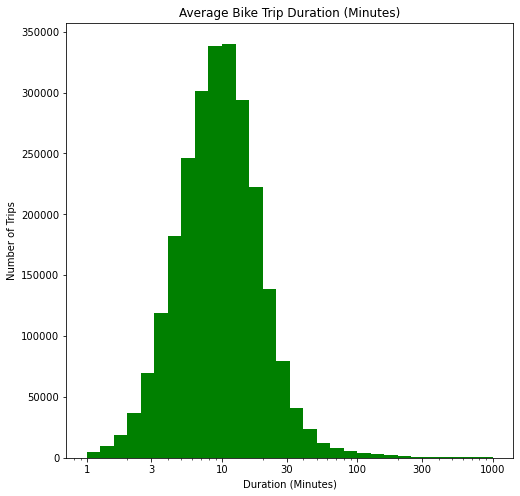

In [10]:
plt.figure(figsize = [8,8])
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_copy , x = 'duration_min' , bins = bins, color='green');
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Duration (Minutes)');
plt.title('Average Bike Trip Duration (Minutes)');
plt.ylabel('Number of Trips');

In [13]:
df_copy['month'] = pd.DatetimeIndex(df_copy['start_time']).month

## Trip Duration(min) vs Months

> From this graph, we can see that summer and winter months don't affect the trip duration, So we can say that weather doesn't affect the trip duration.

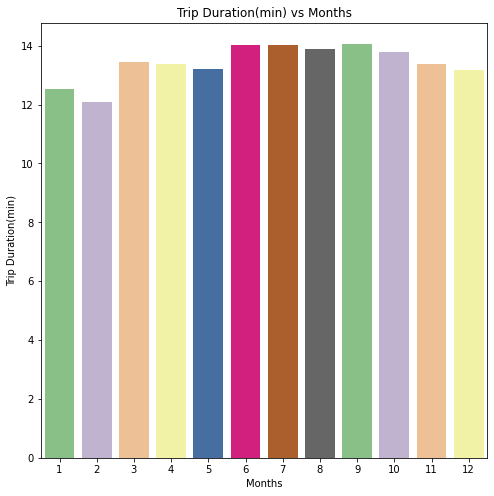

In [14]:
plt.figure(figsize = [8,8])
sns.barplot(data=df_copy,x='month',y='duration_min', color=sns.color_palette()[0], palette="Accent", ci=None)
plt.xlabel('Months')
plt.ylabel('Trip Duration(min)')
plt.title('Trip Duration(min) vs Months');

In [15]:
df_copy['member_age'] = 2020-df_copy['member_birth_year']

## Trip Duration(min) Against Members Age and Gender

> We can see here that members' age doesn't affect the trip duration for females it's just that females members are more than male members.

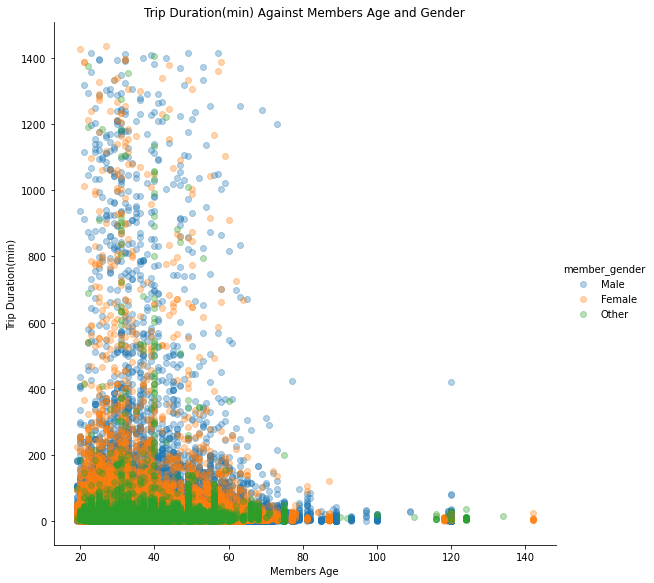

In [16]:
g = sns.FacetGrid(data =  df_copy, hue = 'member_gender', height = 8)
g.map(plt.scatter, 'member_age','duration_min', alpha = 1/3)
g.add_legend()
plt.title('Trip Duration(min) Against Members Age and Gender')
plt.xlabel('Members Age')
plt.ylabel('Trip Duration(min)');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!